#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

###  NAME = OMAR NASSER BAKER 

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

----

## read data 

In [67]:
import pandas as pd
from bs4 import BeautifulSoup
import os
import csv
from itertools import zip_longest
import nest_asyncio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, Binarizer, StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import linregress
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [102]:

df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


----

## Understanding data

In [103]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [104]:
df.head(n=5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


df.describe()

In [105]:
df.shape

(148654, 13)

In [106]:
# we have (148654)row 
# we have (13) columns

-----

In [107]:
## chack if we have missing value 

In [108]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [109]:
df.isnull().sum() / len(df) * 100


Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64

In [110]:
df= df.drop("Status" , axis = 1 )

In [111]:
df= df.drop("Notes" , axis  =1 )

In [112]:
df.isnull().sum() / len(df) * 100

Id                   0.000000
EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.409676
OvertimePay          0.002691
OtherPay             0.002691
Benefits            24.326961
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
Agency               0.000000
dtype: float64

-----

In [113]:
df["Benefits"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
148649    0.0
148650    NaN
148651    NaN
148652    NaN
148653    0.0
Name: Benefits, Length: 148654, dtype: float64

In [114]:
df["Benefits"].unique()

array([         nan, 4.443012e+04, 6.981019e+04, ..., 2.200000e-01,
       1.300000e-01, 1.240000e+00])

In [115]:
df["Benefits"].nunique()

98465

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/8p/bff3r6t55wvfx0c5vm3vybw40000gn/T/ipykernel_24719/1831818948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df[target_column_name])


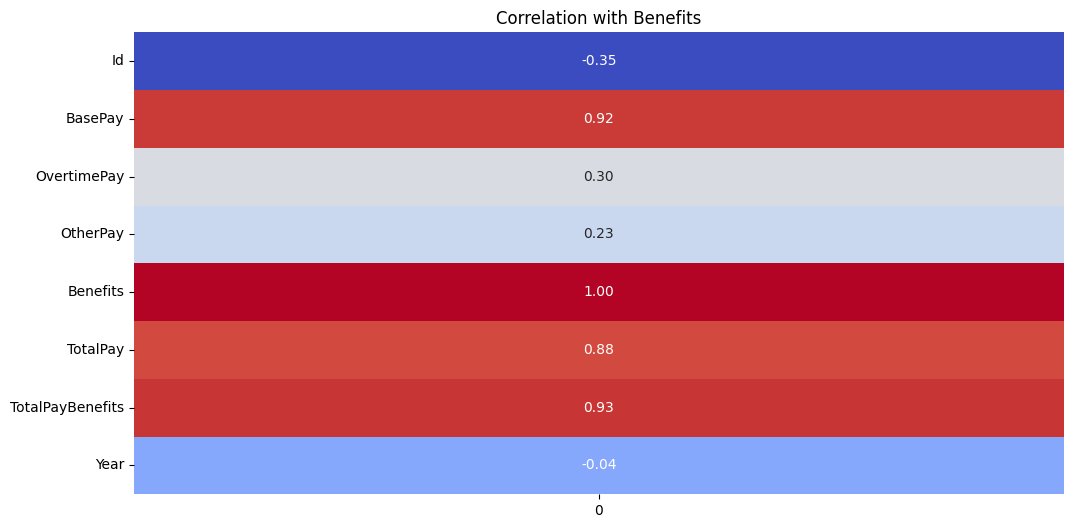

In [117]:
target_column_name = 'Benefits'
correlation_matrix = df.corrwith(df[target_column_name])
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title(f'Correlation with {target_column_name}')
plt.show()


In [118]:


def impute_and_predict(df, target_column, columns_to_drop=None):
    if columns_to_drop is None:
        columns_to_drop = []
    df_without_null = df.dropna(subset=[target_column])
    X = df_without_null.drop(columns=columns_to_drop + [target_column], axis=1)
    y = df_without_null[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    numeric_features = X.select_dtypes(include=['number']).columns
    non_numeric_features = X.select_dtypes(exclude=['number']).columns
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ])
    
    non_numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', non_numeric_transformer, non_numeric_features)
        ])
    
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', RandomForestRegressor())])
    model.fit(X_train, y_train)
    missing_values = df[df[target_column].isnull()].drop(columns=columns_to_drop + [target_column], axis=1)
    if not missing_values.empty:
        imputed_values = model.predict(missing_values)
        df.loc[df[target_column].isnull(), target_column] = imputed_values
    else:
        print("No missing data")
    if not X_test.empty:
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)  # Use y_test instead of y
        print(f"R-squared (R2) score on the test set: {r2}")


In [119]:
impute_and_predict(df, "Benefits", columns_to_drop=["Benefits" , "Id" , "JobTitle" , "EmployeeName" , "Agency"])

R-squared (R2) score on the test set: 0.9977991897432613


In [120]:
df["Benefits"].isna().sum()

0

---------------

## OvertimePay

/var/folders/8p/bff3r6t55wvfx0c5vm3vybw40000gn/T/ipykernel_24719/2914034386.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df[target_column_name])


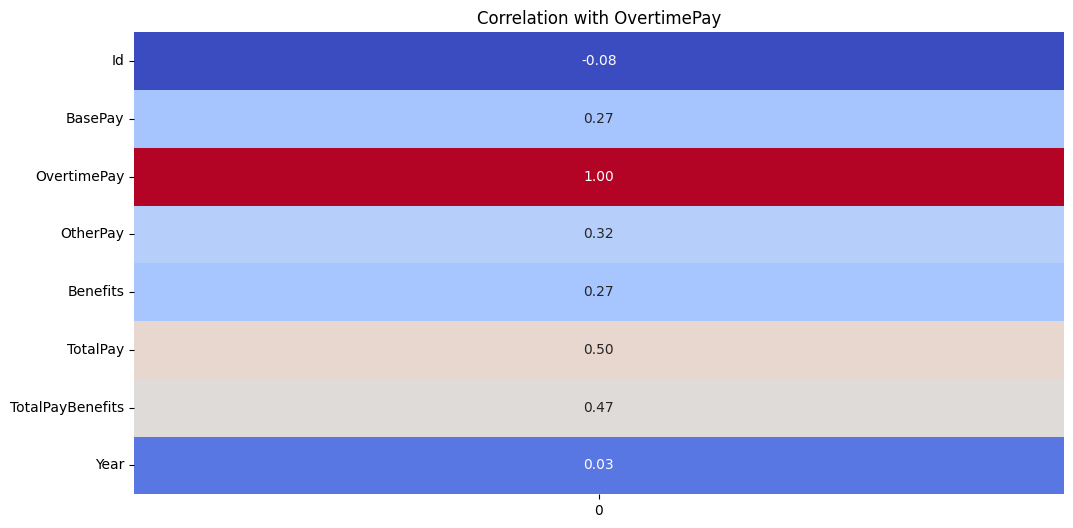

In [121]:
target_column_name = 'OvertimePay'
correlation_matrix = df.corrwith(df[target_column_name])
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title(f'Correlation with {target_column_name}')
plt.show()


In [122]:
impute_and_predict(df, "OvertimePay", columns_to_drop=["OvertimePay" , "Id" , "JobTitle" , "EmployeeName" , "Agency"])

R-squared (R2) score on the test set: 0.9847650781471797


In [123]:
df.isnull().sum() / len(df) * 100

Id                  0.000000
EmployeeName        0.000000
JobTitle            0.000000
BasePay             0.409676
OvertimePay         0.000000
OtherPay            0.002691
Benefits            0.000000
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Agency              0.000000
dtype: float64

/var/folders/8p/bff3r6t55wvfx0c5vm3vybw40000gn/T/ipykernel_24719/1728864232.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df[target_column_name])


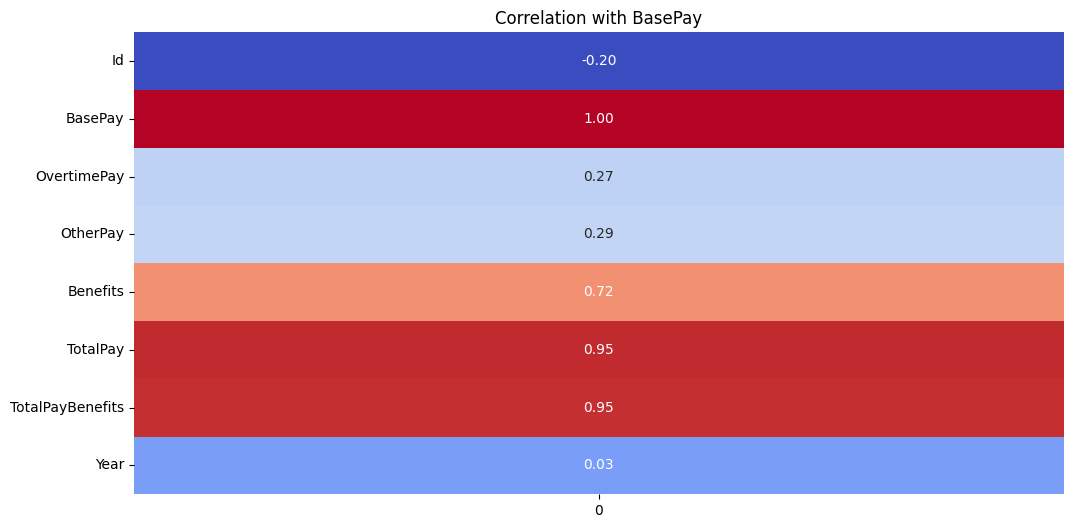

In [124]:
target_column_name = 'BasePay'
correlation_matrix = df.corrwith(df[target_column_name])
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title(f'Correlation with {target_column_name}')
plt.show()


In [125]:
impute_and_predict(df, "BasePay", columns_to_drop=["BasePay" , "Id" , "JobTitle" , "EmployeeName" , "Agency"])

R-squared (R2) score on the test set: 0.9992467942188485


In [126]:
df.isnull().sum() / len(df) * 100

Id                  0.000000
EmployeeName        0.000000
JobTitle            0.000000
BasePay             0.000000
OvertimePay         0.000000
OtherPay            0.002691
Benefits            0.000000
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Agency              0.000000
dtype: float64

/var/folders/8p/bff3r6t55wvfx0c5vm3vybw40000gn/T/ipykernel_24719/1543112759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df[target_column_name])


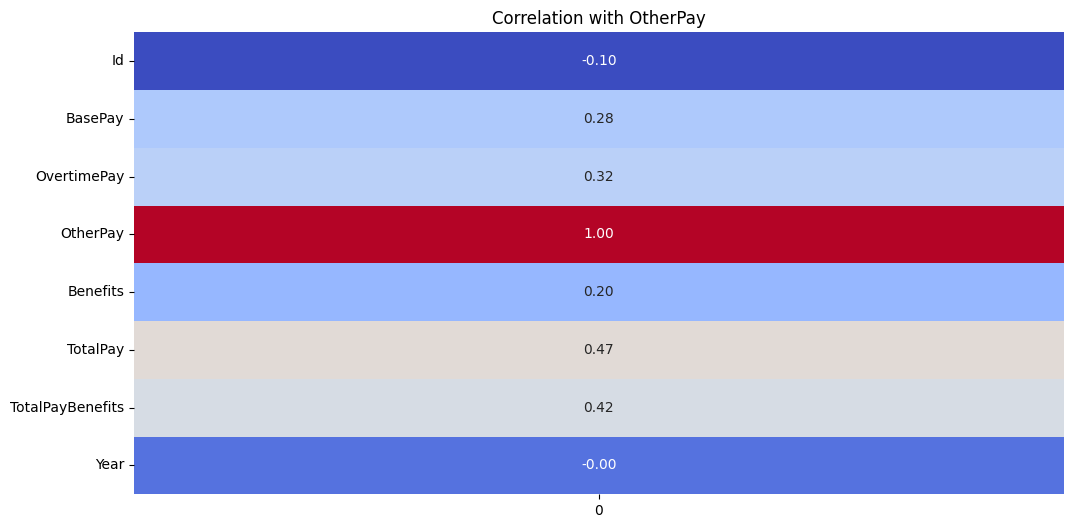

In [127]:
target_column_name = 'OtherPay'
correlation_matrix = df.corrwith(df[target_column_name])
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title(f'Correlation with {target_column_name}')
plt.show()


In [128]:
impute_and_predict(df, "OtherPay", columns_to_drop=["OtherPay" , "Id" , "JobTitle" , "EmployeeName" , "Agency"])

R-squared (R2) score on the test set: 0.9589801337169963


## We notice that r squarer has a high value, and this is called overfit. It must be smoothed, but we need to adjust the excess data because we want to store the new expected data and replace it with the missing data to give us data that is close to the real thing and to give us a correct prediction.

----------------

Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [129]:
df["TotalPay"].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [131]:
df = df[df["TotalPay"] > 0]


In [132]:
df["TotalPay"]

0         567595.43
1         538909.28
2         335279.91
3         332343.61
4         326373.19
            ...    
148621        15.35
148622        13.77
148623        13.35
148624        12.89
148625         6.00
Name: TotalPay, Length: 148285, dtype: float64

In [133]:
df["TotalPay"].describe()

count    148285.000000
mean      74954.383468
std       50441.766219
min           0.300000
25%       36679.200000
50%       71553.000000
75%      105967.060000
max      567595.430000
Name: TotalPay, dtype: float64

In [146]:
from scipy import stats
z_scores = stats.zscore(df["TotalPay"])
print(z_scores)


189       2.788177
190       2.787713
191       2.786524
192       2.783740
193       2.781424
            ...   
148621   -1.527482
148622   -1.527515
148623   -1.527524
148624   -1.527533
148625   -1.527677
Name: TotalPay, Length: 146837, dtype: float64


In [154]:
threshold = 1
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
df= df[(z_scores <= threshold) & (z_scores >= -threshold)]


/var/folders/8p/bff3r6t55wvfx0c5vm3vybw40000gn/T/ipykernel_24719/1419824833.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
/var/folders/8p/bff3r6t55wvfx0c5vm3vybw40000gn/T/ipykernel_24719/1419824833.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df= df[(z_scores <= threshold) & (z_scores >= -threshold)]


In [156]:
df["TotalPay"].describe()

count     90527.000000
mean      74274.540012
std       23709.975503
min       25350.970000
25%       57049.590000
50%       73139.160000
75%       92416.155000
max      121410.730000
Name: TotalPay, dtype: float64

In [157]:
mean_total_pay = df['TotalPay'].mean()
median_total_pay = df['TotalPay'].median()
mode_total_pay = df['TotalPay'].mode()[0]
min_total_pay = df['TotalPay'].min()
max_total_pay = df['TotalPay'].max()
total_pay_range = max_total_pay - min_total_pay
std_deviation_total_pay = df['TotalPay'].std()
 

In [158]:
mean_total_pay

74274.54001248245

In [159]:
median_total_pay

73139.16

In [160]:
mode_total_pay

105489.0

In [161]:
min_total_pay

25350.97

In [162]:
max_total_pay

121410.73

In [163]:
total_pay_range

96059.76

In [164]:
std_deviation_total_pay

23709.975502596255

--------------------

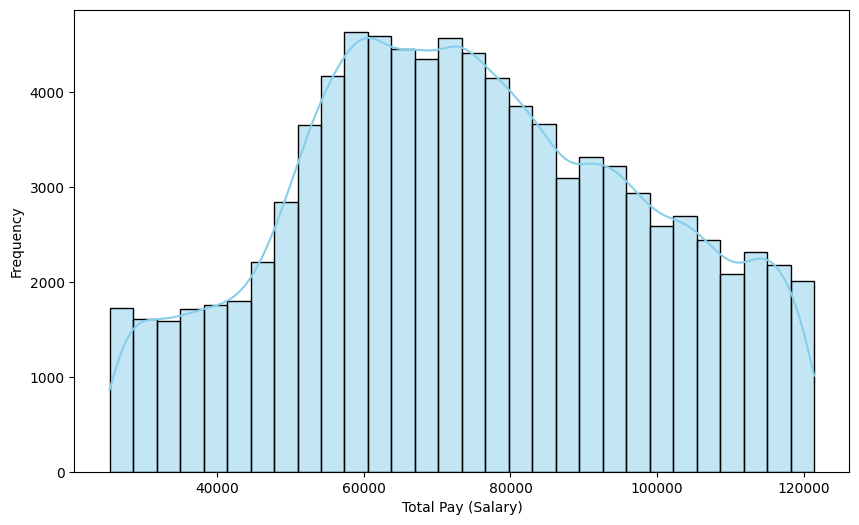

In [170]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='skyblue')
plt.xlabel('Total Pay (Salary)')
plt.ylabel('Frequency')
plt.show()


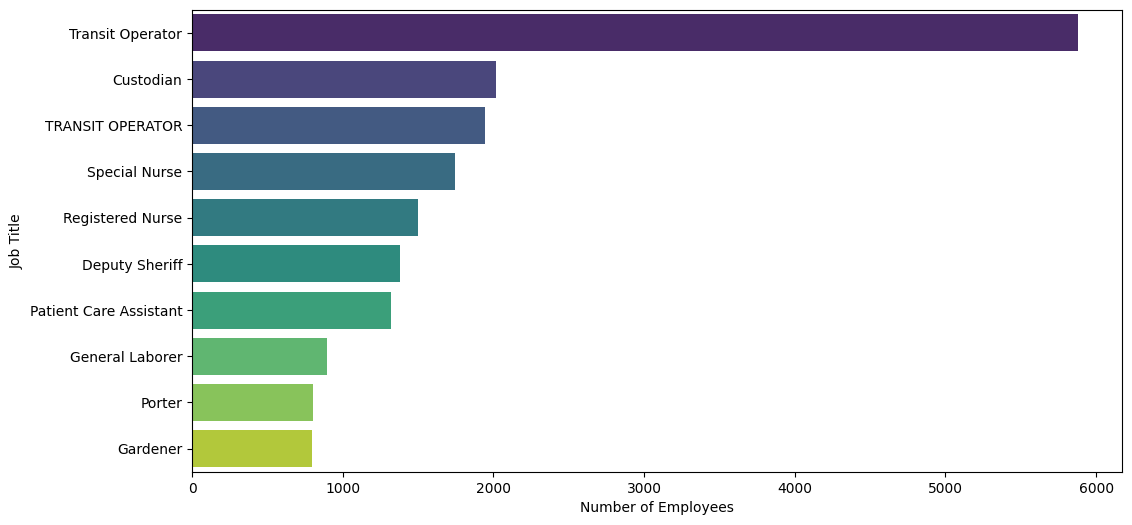

In [171]:

department_counts = df['JobTitle'].value_counts()[:10]  # Assuming you want to plot the top 10 departments
plt.figure(figsize=(12, 6))
sns.barplot(x=department_counts.values, y=department_counts.index, palette='viridis')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.show()


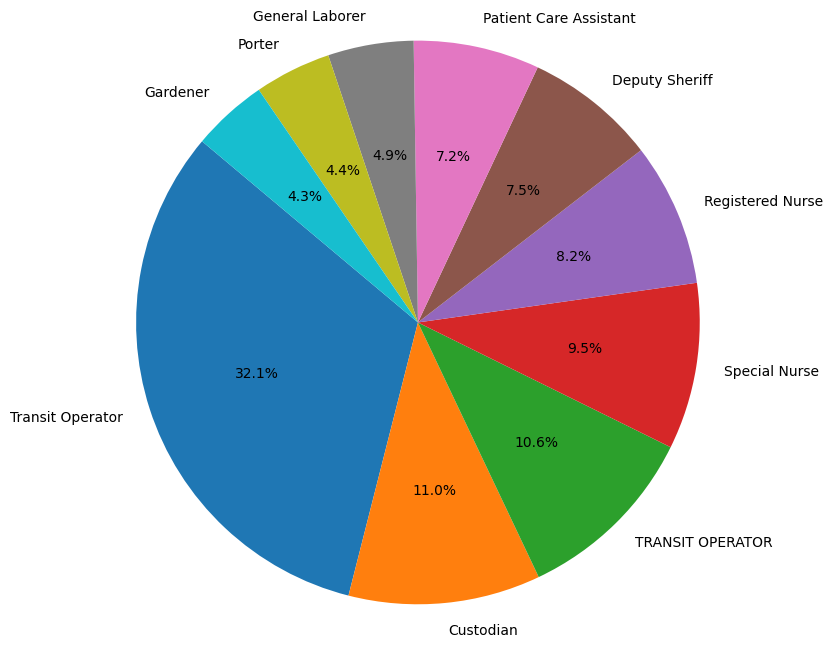

In [172]:
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()


In [174]:
grouped_by_department = df.groupby('JobTitle')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
grouped_by_department

,JobTitle,count,mean,median,min,max
0,ACCOUNT CLERK,73,48310.103699,49777.850,29981.57,60838.20
1,ACCOUNTANT,4,58999.485000,62650.775,45304.38,65392.01
2,ACCOUNTANT INTERN,23,49534.622609,53789.800,30832.81,58799.53
3,"ACPO,JuvP, Juv Prob (SFERS)",1,62290.780000,62290.780,62290.78,62290.78
4,ACUPUNCTURIST,1,67594.400000,67594.400,67594.40,67594.40
...,...,...,...,...,...,...
1905,X-RAY LABORATORY AIDE,21,61246.605714,61307.670,40554.31,85077.40
1906,X-Ray Laboratory Aide,80,59635.176125,64481.990,25376.40,99812.97
1907,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1,53632.870000,53632.870,53632.87,53632.87
1908,Youth Comm Advisor,3,48814.840000,52433.880,36465.91,57544.73


In [175]:
grouped_by_department_year = df.groupby(['JobTitle', 'Year'])['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
grouped_by_department_year

,JobTitle,Year,count,mean,median,min,max
0,ACCOUNT CLERK,2011,73,48310.103699,49777.850,29981.57,60838.20
1,ACCOUNTANT,2011,4,58999.485000,62650.775,45304.38,65392.01
2,ACCOUNTANT INTERN,2011,23,49534.622609,53789.800,30832.81,58799.53
3,"ACPO,JuvP, Juv Prob (SFERS)",2014,1,62290.780000,62290.780,62290.78,62290.78
4,ACUPUNCTURIST,2011,1,67594.400000,67594.400,67594.40,67594.40
...,...,...,...,...,...,...,...
3552,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",2011,1,53632.870000,53632.870,53632.87,53632.87
3553,Youth Comm Advisor,2012,1,57544.730000,57544.730,57544.73,57544.73
3554,Youth Comm Advisor,2013,1,52433.880000,52433.880,52433.88,52433.88
3555,Youth Comm Advisor,2014,1,36465.910000,36465.910,36465.91,36465.91


In [176]:
average_salary_by_department = grouped_by_department[['JobTitle', 'mean']]
average_salary_by_department = average_salary_by_department.sort_values(by='mean', ascending=False)
average_salary_by_department.head()


,JobTitle,mean
311,COURT ADMINISTRATOR,121173.34
266,"CHIEF STATIONARY ENGINEER, WATER TREATMENT PLANT",121051.25
319,COURT COMPUTER FACILITIES COORDINATOR,120994.60
1173,PLUMBER SUPERVISOR II,120929.23
1208,PRINCIPAL REAL PROPERTY OFFICER,120049.00


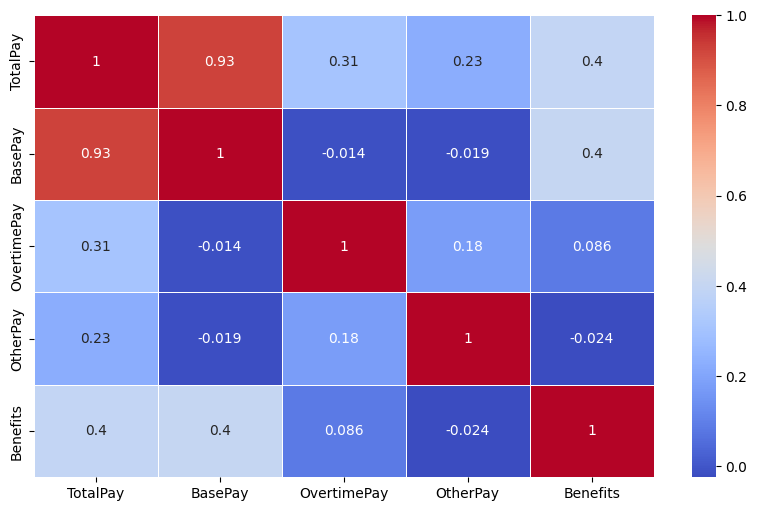

In [178]:
correlation_matrix = df[['TotalPay', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

High Correlation between TotalPay and BasePay: The correlation coefficient of 0.93 indicates a very strong positive relationship between TotalPay and BasePay. This suggests that BasePay is a significant component of TotalPay and that as BasePay increases, TotalPay tends to increase as well.
Moderate Correlation between TotalPay and Benefits: The correlation coefficient of 0.4 implies a moderate positive relationship between TotalPay and Benefits. This means that there is some tendency for TotalPay to increase with Benefits, but other factors also play a substantial role in determining TotalPay.
Low Correlation between OvertimePay and Other Variables: OvertimePay shows a low positive correlation with TotalPay (0.31) and an even lower correlation with Benefits (0.086). This suggests that OvertimePay contributes to the total compensation but not as significantly as BasePay does. The low correlation with Benefits indicates that the provision of benefits is not strongly linked with the amount of overtime pay.
Negligible or No Correlation between OtherPay and Other Variables: OtherPay has negligible correlations with BasePay (-0.019) and Benefits (-0.024), and a low positive correlation with TotalPay (0.23). This indicates that OtherPay is relatively independent of the other types of compensation and does not significantly influence the total compensation package.
BasePay and Benefits Correlation: There is a correlation coefficient of 0.4 between BasePay and Benefits, suggesting a moderate positive relationship. This indicates that employees with higher base salaries may also receive more benefits, although other factors are also influencing the benefits received.
